In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
telecom_orig = pd.read_csv("telecom_churn_data.csv",encoding = "ISO-8859-1")

# 1. Data

In [3]:
telecom = telecom_orig.copy()
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### 1.1 Data overview

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
print ("Rows     : " ,telecom.shape[0])
print ("Columns  : " ,telecom.shape[1])
print ("\nFeatures : \n" ,telecom.columns.tolist())
print ("\nMissing values :  ",telecom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telecom.nunique())

Rows     :  99999
Columns  :  226

Features : 
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og

In [6]:
# Checking null values in each column
telecom.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [7]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


#### If we check the unique values in the following variables, we find that there are only 2 unique values and they are 0 and 1. We can confirm that there are following 8 categorical variables are there with the value 0 and 1 with missing values

CATEGORICAL VARIABLES:

•night_pck_user_6
•night_pck_user_7
•night_pck_user_8
•night_pck_user_9
•fb_user_6
•fb_user_7
•fb_user_8
•fb_user_9


##### Missing values can be imputed with '-1' where -1 can be treated as a new category

In [8]:
# Missing values can be imputed with '-1' 
# where -1 can be treated as a new category.

categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in categorical_vars:
    telecom[var].fillna(value=-1, inplace=True)

In [9]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_v = pd.get_dummies(telecom['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_v = pd.get_dummies(telecom['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_v = pd.get_dummies(telecom['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_v = pd.get_dummies(telecom['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_v = pd.get_dummies(telecom['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_v = pd.get_dummies(telecom['fb_user_8'],prefix="fb8",drop_first=True)

telecom = pd.concat([telecom,night_pck_user_6_v],axis=1)
telecom = pd.concat([telecom,night_pck_user_7_v],axis=1)
telecom = pd.concat([telecom,night_pck_user_8_v],axis=1)

telecom = pd.concat([telecom,fb_user_6_v],axis=1)
telecom = pd.concat([telecom,fb_user_7_v],axis=1)
telecom = pd.concat([telecom,fb_user_8_v],axis=1)

# drop all categorial columns
telecom = telecom.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

### Missing Value Treatment
We can treat the missing values in following 2 methods
1. Delete: Delete the missing values 
2. Impute: 
    - Imputing by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc. 
    - Predictive techniques: Use statistical models such as k-NN, SVM etc. to predict and impute missing values

In [10]:
# Checking null values in each column
telecom.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
fb6_1.0              0
fb7_0.0              0
fb7_1.0              0
fb8_0.0              0
fb8_1.0              0
Length: 232, dtype: int64

In [11]:
# Percentage of missing values (column-wise)
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
fb6_1.0           0.00
fb7_0.0           0.00
fb7_1.0           0.00
fb8_0.0           0.00
fb8_1.0           0.00
Length: 232, dtype: float64

In [12]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [13]:
# Treat missing values
# Columns used for filtering high-value customers, can't be dropped
# total_rech_data_6 
# total_rech_data_7 
# av_rech_amt_data_6 
# av_rech_amt_data_7 

# All these columns has more than 70% missing values

print(telecom.total_rech_data_6.describe())
print(telecom.total_rech_data_7.describe())
print(telecom.av_rech_amt_data_6.describe())
print(telecom.av_rech_amt_data_7.describe())

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64
count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64
count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64
count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64


(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

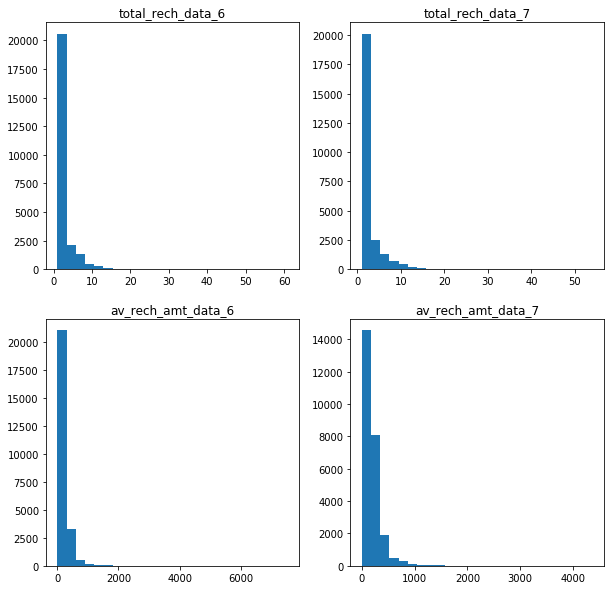

In [14]:
# Let us look at the distribution to find out the value to fill
# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(),bins=25)

In [15]:
# Variables are numeric 
# The minimum value is 1, and not zero, 
# The rows with missing values also have the 'dates of recharge' columns missing -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed with 0.

telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [16]:
# Column analysis % of missing values
print(round(100*(telecom.isnull().sum()/len(telecom.index)), 2))

# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
fb6_1.0           0.00
fb7_0.0           0.00
fb7_1.0           0.00
fb8_0.0           0.00
fb8_1.0           0.00
Length: 232, dtype: float64
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_

In [17]:
drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
telecom.drop(drop_missing_values_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  24
Dataframe Shape:  (99999, 208)


### Filter High-Value Customers

In [18]:
# New DERIVED Columns for Total Data Recharge Amount

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]*telecom['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)

In [19]:
# Filter high-value customers
avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                      telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months/good phase/6th & 7th month avg recharge amount: ', amont_70_pc)

telecom = telecom[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape)

70 percentile of first two months/good phase/6th & 7th month avg recharge amount:  478.0
Dataframe Shape:  (30001, 204)


### Identify Curn & Tag Churners

In [20]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)
#telecom["churn"].head(10)

# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [title for title in list(telecom) if title.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
telecom.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  48
Dataframe Shape:  (30001, 157)


### Identify columns that have no varience & Drop

In [21]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count)

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero)
drop_no_varience_columns = list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one)
drop_no_varience_columns += list(telecom_unique_count_is_one.index)

telecom.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', telecom.shape)

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_7    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
std_ic_t2o_mou_6        1
last_date_of_month_8    1
std_ic_t2o_mou_7        1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_8        1
dtype: int64
Number of columns dropped here  =  13
Dataframe Shape:  (30001, 144)


In [22]:
telecom.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,0,1,0,1,0,1,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,0,0,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,1,0,1,0.0,354.0,207.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,0,0,0.0,0.0,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,0,0,1,0,1,0.0,712.0,540.0,0
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,0,1,5285.0,20424.0,455.0,0
38,7000815202,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,...,0,0,0,0,0,0,0.0,0.0,0.0,0
41,7000721289,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,...,0,0,0,0,0,0,0.0,0.0,0.0,0
48,7000294396,1873.271,575.927,179.218,2061.69,881.43,156.91,1087.76,258.29,68.18,...,0,0,0,0,0,0,0.0,0.0,0.0,0
53,7002188521,978.077,1141.296,706.020,135.14,119.59,102.69,479.31,543.18,261.34,...,0,1,1,0,1,0,344.0,575.0,23.0,0


#### Row-Wise: Missing Values

In [23]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  telecom.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = telecom.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


0        54
77       27
91        1
111      27
188      28
         ..
99672     1
99700    27
99790    55
99827    27
99851    56
Length: 1838, dtype: int64

In [24]:
# small percentage of rows has more than or equal to 27 missing values
drop_rows = telecom.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/telecom.shape[0]*100))

# drop rows with missing values greater >= 27
telecom = telecom[telecom.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', telecom.shape)

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %
Dataframe Shape after dropping rows:  (28504, 144)


In [25]:
rows_missing_data = telecom.isnull().sum(axis=1)
#print(rows_missing_data)
print(rows_missing_data[rows_missing_data > 0])

91       1
191      1
588      1
603      2
679      1
        ..
98971    1
99224    2
99313    1
99515    1
99672    1
Length: 341, dtype: int64


In [26]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

date_of_last_rech_6    0.12
date_of_last_rech_7    0.18
date_of_last_rech_8    0.97
dtype: float64

Note: The remaining missing values are in date columns, before imputing convert them into appropreate values for analysis.

### Fix Dates & convert to meaningful numbers
1. Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
2. convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before number of days to month end)

In [27]:
# covert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
telecom[date_vars].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014
33,6/30/2014,7/30/2014,8/26/2014


In [28]:
# convert to datetime
for col in date_vars:
    telecom[col] = pd.to_datetime(telecom[col])

print(telecom[date_vars].info())
telecom[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    28471 non-null datetime64[ns]
date_of_last_rech_7    28452 non-null datetime64[ns]
date_of_last_rech_8    28228 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 890.8 KB
None


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24
33,2014-06-30,2014-07-30,2014-08-26


In [29]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

telecom["rech_days_left_6"]      = (last_date_of_month_6 - telecom.date_of_last_rech_6).astype('timedelta64[D]')
telecom["rech_days_left_7"]      = (last_date_of_month_7 - telecom.date_of_last_rech_7).astype('timedelta64[D]')
telecom["rech_days_left_8"]      = (last_date_of_month_8 - telecom.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
#print(telecom[day_columns].head(10))
print(telecom[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
rech_days_left_6    28471 non-null float64
rech_days_left_7    28452 non-null float64
rech_days_left_8    28228 non-null float64
dtypes: float64(3)
memory usage: 890.8 KB
None


In [30]:
# Drop all old date columns: add dates columns to drop_column list
telecom.drop(date_vars, axis=1, inplace=True)
telecom1 = telecom.copy()

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  3
Dataframe Shape:  (28504, 144)


In [31]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

rech_days_left_6    0.12
rech_days_left_7    0.18
rech_days_left_8    0.97
dtype: float64

In [32]:
telecom[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28471.000000,28452.000000,28228.000000
mean,3.388044,3.486504,4.147478
std,4.490864,4.289200,5.104752
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,2.000000,2.000000,3.000000
75%,4.000000,5.000000,6.000000
max,29.000000,30.000000,30.000000


In [33]:
# Mean & Median are different: imputing with median value for recharge days left 
telecom.loc[np.isnan(telecom['rech_days_left_6']), ['rech_days_left_6']] = telecom['rech_days_left_6'].median()
telecom.loc[np.isnan(telecom['rech_days_left_7']), ['rech_days_left_7']] = telecom['rech_days_left_7'].median()
telecom.loc[np.isnan(telecom['rech_days_left_8']), ['rech_days_left_8']] = telecom['rech_days_left_8'].median()

#round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print("\nTotal Number of missing values in the data frame = {}".format(telecom.isnull().sum().sum()))
print('Dataframe Shape: ', telecom.shape)


Total Number of missing values in the data frame = 0
Dataframe Shape:  (28504, 144)


### Oulier Assessment
- Use data distribution to find outliers

In [34]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,...,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,...,0.523505,0.057395,0.484353,444.792240,527.562376,469.506616,0.055992,3.386437,3.483792,4.136367
std,6.877760e+05,448.960314,480.075654,500.754116,458.723036,482.671988,464.022072,479.249454,502.604354,485.648594,...,0.499456,0.232601,0.499764,1417.124391,1481.601197,1644.912839,0.229911,4.488511,4.285755,5.081219
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000623e+09,317.360500,322.602500,254.759000,20.140000,19.530000,14.840000,80.732500,80.352500,60.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.001218e+09,485.169000,488.899500,442.791000,89.985000,89.910000,74.085000,231.550000,231.825000,199.875000,...,1.000000,0.000000,0.000000,92.000000,100.000000,25.000000,0.000000,2.000000,2.000000,3.000000
75%,7.001807e+09,698.914000,704.999500,672.453250,298.760000,304.895000,257.415000,494.372500,506.467500,457.432500,...,1.000000,0.000000,1.000000,392.000000,575.000000,342.000000,0.000000,4.000000,5.000000,6.000000
90%,7.002166e+09,987.580200,1001.338500,991.085300,760.844000,801.711000,688.281000,898.931000,931.197000,844.924000,...,1.000000,0.000000,1.000000,1051.400000,1374.000000,1118.800000,0.000000,10.000000,9.000000,10.000000
95%,7.002285e+09,1232.633400,1268.472050,1267.392650,1135.715000,1206.173000,1101.550000,1256.088500,1292.275500,1187.343500,...,1.000000,1.000000,1.000000,2025.000000,2424.000000,2268.000000,1.000000,14.000000,13.000000,15.000000
99%,7.002385e+09,1955.145730,1999.462350,1989.922110,2146.076400,2220.474500,2175.252400,2301.026700,2434.539600,2219.376900,...,1.000000,1.000000,1.000000,5129.730000,6219.160000,5749.820000,1.000000,19.000000,18.000000,25.000000


* Most of the outliers are on the revenue data and the model being built is on usage of voice and data.
* Hence there is no need to treat these outliers

# <font color='green'>SUMMARY PART 1: DATA UNDERSTANDING AND CLEANING</font>

In [35]:
print('Original Dataframe Shape: ', telecom_orig.shape)
print("Original Dataframe Info: \n"); telecom_orig.info()
print("Original Dataframe Nulls:", telecom_orig.isnull().sum().sum())

print('Cleaned Dataframe Shape: ', telecom.shape)
print("Cleaned Dataframe Info: \n"); telecom.info()
print("Cleaned Dataframe Nulls:", telecom.isnull().sum().sum())

Original Dataframe Shape:  (99999, 226)
Original Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
Original Dataframe Nulls: 3594931
Cleaned Dataframe Shape:  (28504, 144)
Cleaned Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int32(1), int64(26), uint8(12)
memory usage: 29.1 MB
Cleaned Dataframe Nulls: 0


### Save the cleaned data in new file

In [36]:
# write treated telecom file
telecom.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

# <font color='green'>PART 2: EXPLORATORY DATA ANALYSIS (EDA)</font>
1. Univariate 
2. Bivatiate Analysis
3. Check imbalance in data-set (dependent variable)

In [37]:
# # Load csv data file
# telecom_orig = pd.read_csv('telecom_churn_data_clean_cat.csv', low_memory=False)
# telecom = telecom_orig.copy()

In [38]:
telecom_orig = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
telecom = telecom_orig.copy()

### Dependent Variable: check data imbalance

In [39]:
#checking whether data is imbalanced or not
churn  = telecom["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Count     = 1596
Total Not-Churn Count = 26908
Churn Rate            = 5.60%


OBSERVATION: Data is highly imbalanced, we need to balance it before we can create the model

### Univariate Analysis on  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [40]:
df_not_churn = telecom[telecom["churn"] == 0]
df_churn     = telecom[telecom["churn"] == 1]

In [41]:
#claculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
11.826036866359447
14.31704260651629
median:
9.0
12.0
Quantiles:
[ 0.  6.  9. 14.]
[ 0.  8. 12. 18.]


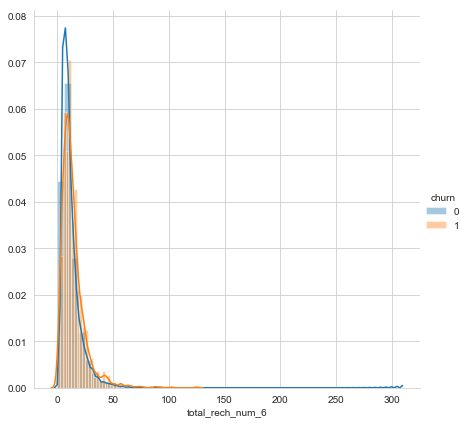

In [42]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [43]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

Mean:
11.875464545859968
13.43170426065163
median:
9.0
10.0
Quantiles:
[ 0.  6.  9. 15.]
[ 0.  7. 10. 17.]


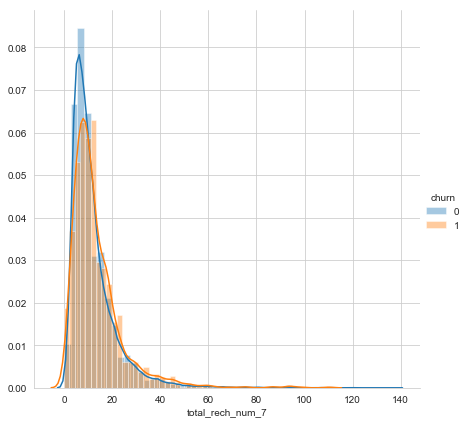

In [44]:
#feature importance of total_rech_data_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [45]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

Mean:
10.523561766017542
7.021303258145363
median:
8.0
5.0
Quantiles:
[ 0.  5.  8. 13.]
[0. 3. 5. 9.]


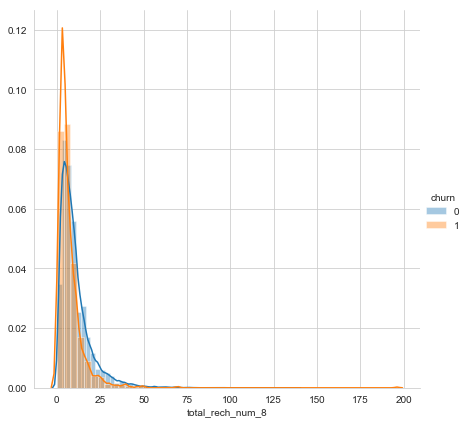

In [46]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

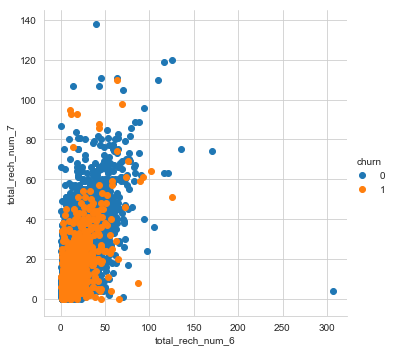

In [47]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

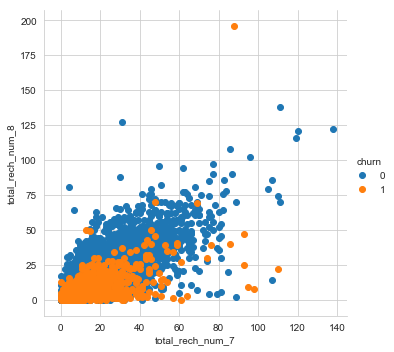

In [48]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

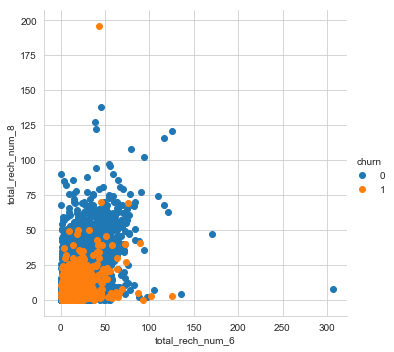

In [49]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'

In [50]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
656.1418537237996
786.3007518796992
median:
564.0
669.0
Quantiles:
[  0. 366. 564. 820.]
[  0. 450. 669. 984.]


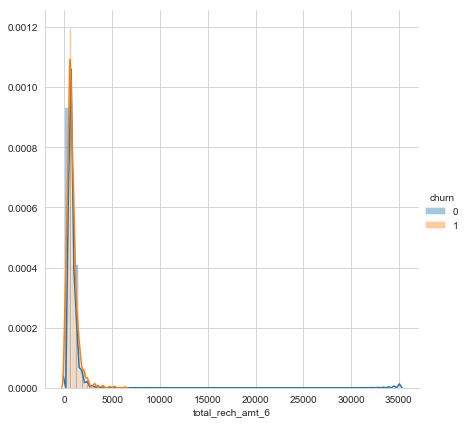

In [51]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

In [52]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

Mean:
668.5358257767207
733.1115288220551
median:
570.0
616.0
Quantiles:
[  0. 366. 570. 833.]
[  0.   382.75 616.   939.25]


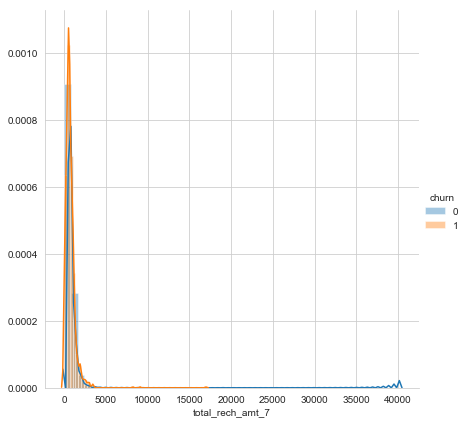

In [53]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

In [54]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
619.713691095585
352.98809523809524
median:
518.0
190.0
Quantiles:
[  0. 288. 518. 800.]
[  0.    16.5  190.   506.25]


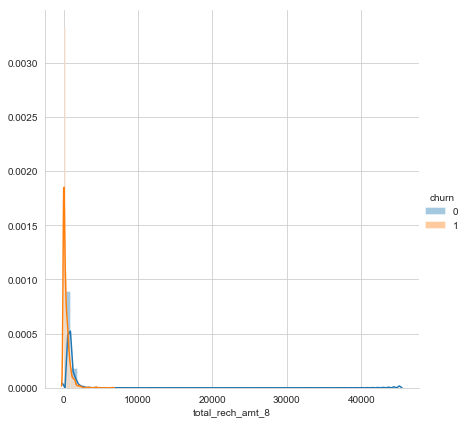

In [55]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

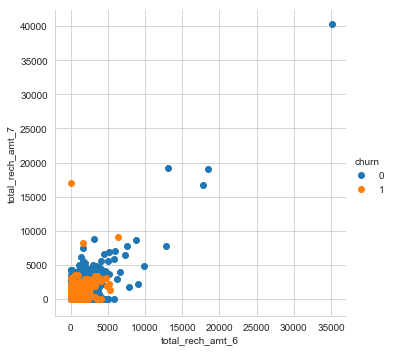

In [56]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

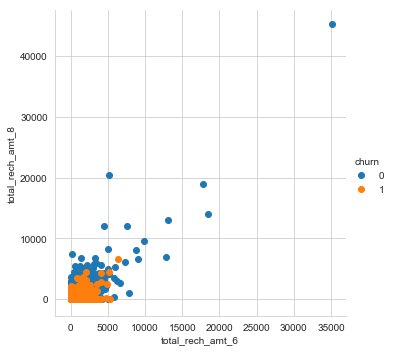

In [57]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

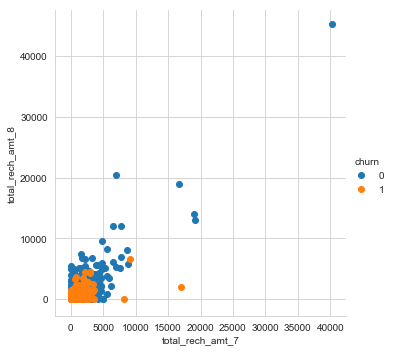

In [58]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'

In [59]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))

Mean:
168.3110227441653
158.79761904761904
median:
120.0
110.0
Quantiles:
[  0. 110. 120. 200.]
[  0. 100. 110. 154.]


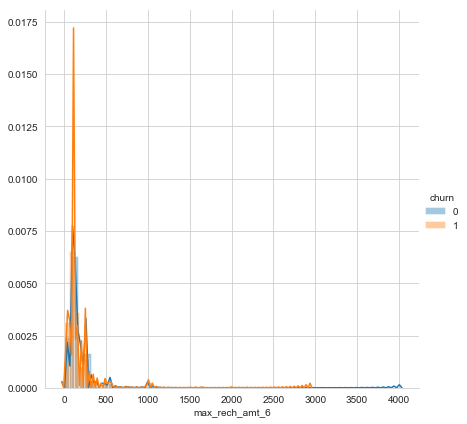

In [60]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()

In [61]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))

Mean:
171.94440315147912
159.51629072681703
median:
130.0
110.0
Quantiles:
[  0. 110. 130. 200.]
[  0.  98. 110. 154.]


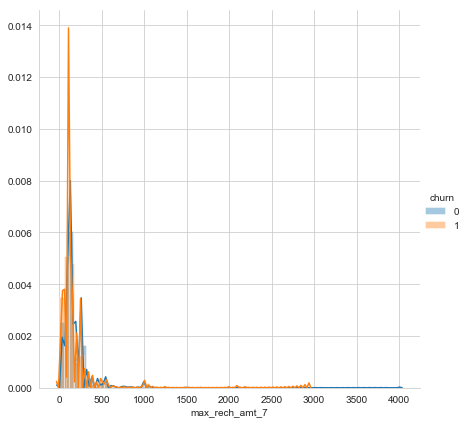

In [62]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()

In [63]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))

Mean:
166.4161959268619
111.0983709273183
median:
144.0
56.0
Quantiles:
[  0.  70. 144. 198.]
[  0.  10.  56. 130.]


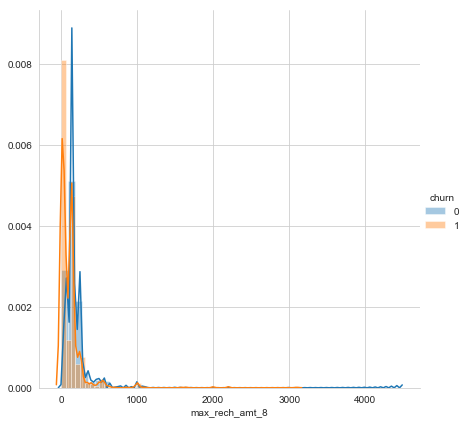

In [64]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

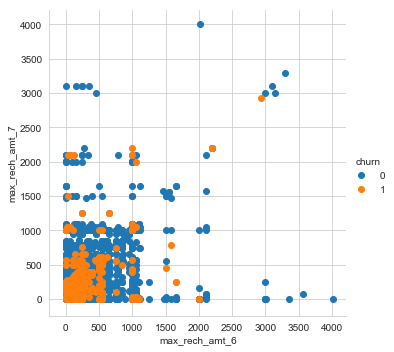

In [65]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

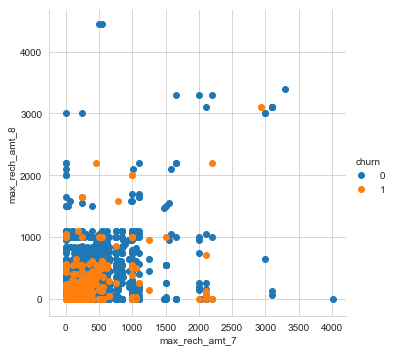

In [66]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

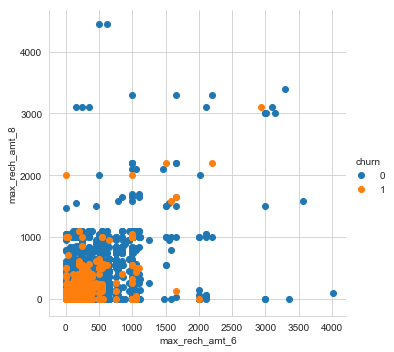

In [67]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

### Correlation Matrix: Bivariate Analysis

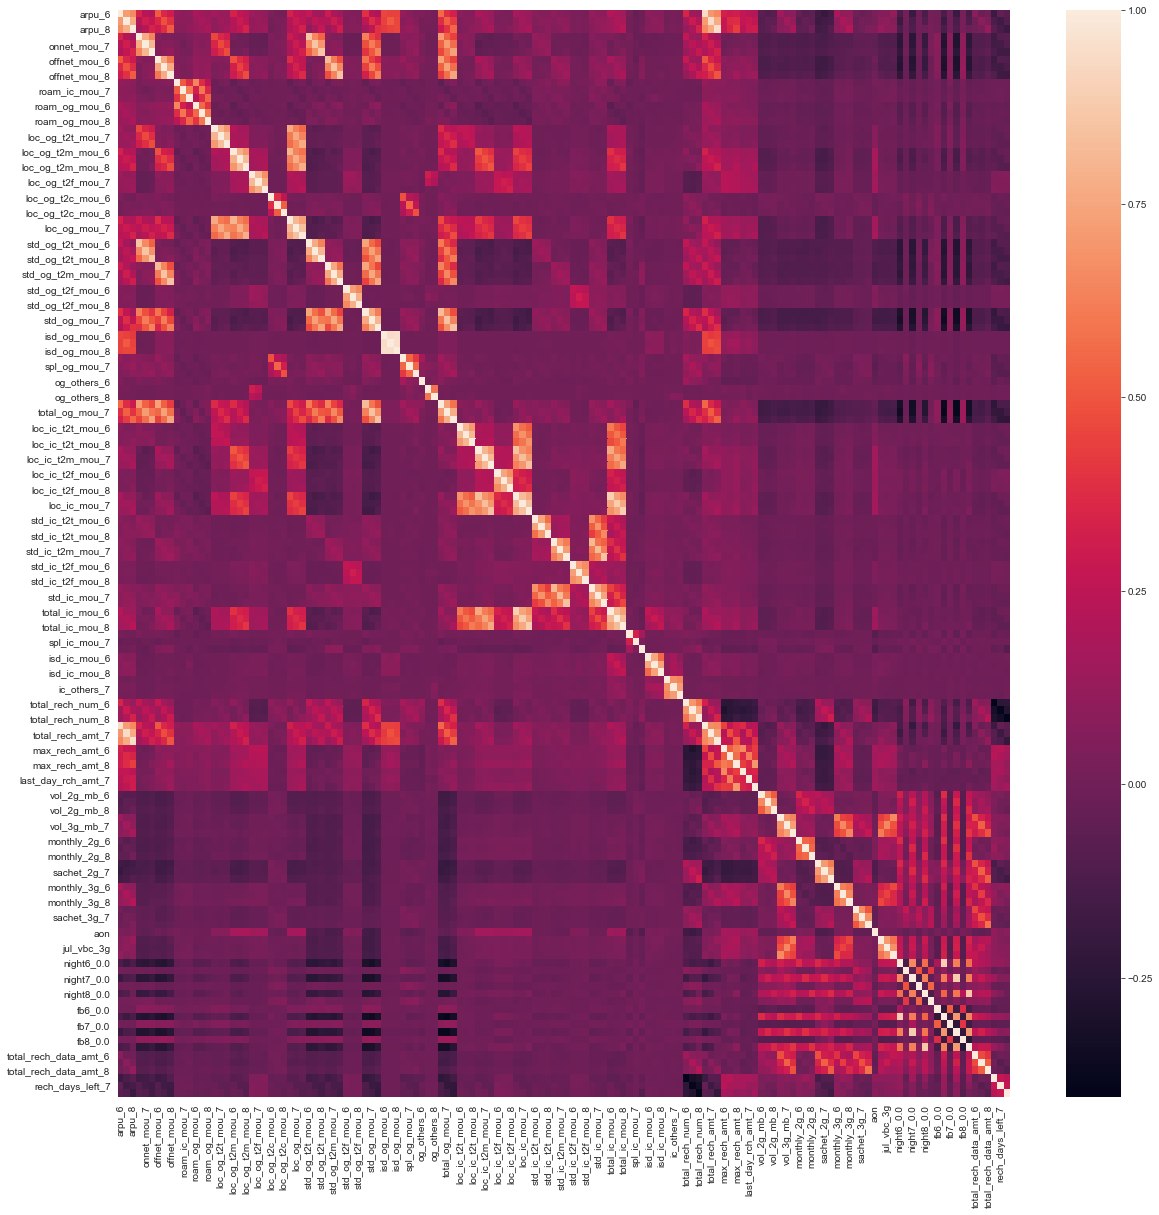

In [68]:
telecom2 = telecom.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom2.corr())

In [69]:
# Create correlation matrix
corr_matrix = telecom2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:36

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'fb6_1.0', 'fb7_1.0', 'fb8_1.0']


* OBSERVATION: 38 highly correlated features (> 80%) found in the data set.
* NOTE: We are not dropping these columns manually rather using feature reduction methods to do the job. We worked with RFE, LASSO and PCA.

# <font color='green'>SUMMARY PART 2: EXPLORATORY DATA ANALYSIS (EDA)</font>

OBSERVATIONS
1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. From univariate analysis some relationship is emerging to the churn, but no clear relationship found.
3. There are many highly correlated features, found 38 features with more then 0.8 correlation.

NEXT STEPS:
1. Need to balance the data, apply suitable data-balancing method
2. Features are highly correlated, use feture reduction methods before modelling.

# <font color='green'>PART 3: FEATURE REDUCTION USING RFE & LOGISTIC REGRESSION</font>

In [70]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.options.display.float_format = '{:.2f}'.format

In [71]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.00,0.00,0.00,1,3.00,6.00,5.00
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.00,354.00,207.00,0,5.00,0.00,1.00
2,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0.00
3,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.00,712.00,540.00,0,12.00,24.00,7.00
4,7000149764,977.02,2362.83,409.23,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.00,20424.00,455.00,0,0.00,1.00,5.00


In [72]:
print('Dataframe Shape: ', master_df.shape)
print("Dataframe Info: \n"); master_df.info()

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


In [73]:
# Drop MemberID/Phone-number
telecom = master_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [74]:
X.shape

(28504, 142)

### Data Standardization/Normalization

In [75]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [76]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [77]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


### Balance data set by oversampling

In [78]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [79]:
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [80]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 142)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


### Feature reduction using RFE

In [81]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_tr, y_tr)

In [82]:
#print(rfe.support_)
#print(rfe.ranking_) 
rfe_features = list(df_telecom.columns[rfe.support_])
print("Features identified by RFE for model buidling: ", rfe_features)

Features identified by RFE for model buidling:  ['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'aon', 'fb8_1.0', 'total_rech_data_amt_8', 'rech_days_left_8']


In [83]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

### Logistic Regression Model

In [84]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6622 1453]
 [  87  390]]


In [86]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8075
           1       0.21      0.82      0.34       477

   micro avg       0.82      0.82      0.82      8552
   macro avg       0.60      0.82      0.62      8552
weighted avg       0.94      0.82      0.86      8552



# <font color='green'>SUMMARY PART 3: FEATURE REDUCTION USING RFE & LOGISTIC REGRESSION</font>
OBSERVATIONS
1. Getting 81.0% accuracy 
2. Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.
3. Key features obtained from RFE: 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'rech_days_left_8'

NEXT STEPS:
1. Use better models that suits this problem.

# PCA with Logistic Regression

In [88]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)

In [89]:
# Understand the properties of loaded dataframe
telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape)
print("Dataframe Info: \n"); telecom.info()
telecom.head(5)

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.00,0.00,0.00,1,3.00,6.00,5.00
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.00,354.00,207.00,0,5.00,0.00,1.00
2,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0.00
3,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.00,712.00,540.00,0,12.00,24.00,7.00
4,7000149764,977.02,2362.83,409.23,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.00,20424.00,455.00,0,0.00,1.00,5.00


In [90]:
# Drop mobile number
telecom.drop('mobile_number', axis=1, inplace=True)

## Create X, y variables

In [91]:
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

## Standardising the scale

In [92]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

## Split

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [94]:
print(X_train.shape)
print(X_test.shape)

(19952, 142)
(8552, 142)


In [95]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.0613895095222896
Imbalance in Test Data: 0.054500616522811345


# Applying smote

In [96]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(37596, 142)
(37596,)


18798

In [97]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37596, 142)
y_tr Dataframe Shape (37596,)
Imbalance in Train Data: 1.0


# Applying PCA

In [98]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37596, 142)
(8552, 142)


# Apply logistic regression

In [100]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [101]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6669 1441]
 [  81  361]]


In [102]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8220299345182414


In [103]:
pca.components_

array([[ 1.50875533e-01,  1.48384677e-01,  9.70659049e-02, ...,
        -7.31466166e-02, -5.44901819e-02, -3.11042938e-02],
       [ 8.47051873e-02,  1.04568941e-01,  1.44825366e-01, ...,
         3.00320827e-02,  3.23724712e-04, -6.70402210e-03],
       [ 1.84052569e-02,  1.93914702e-03, -5.30204306e-03, ...,
         2.11683916e-02,  4.80405243e-02,  1.66591274e-02],
       ...,
       [-0.00000000e+00,  1.66295257e-16,  1.00939306e-16, ...,
         3.51984628e-18,  4.84810097e-17,  1.49872107e-17],
       [-3.13570298e-16,  7.74695168e-17, -1.00319698e-16, ...,
         2.87308080e-17,  2.97794242e-19, -4.01623851e-17],
       [-0.00000000e+00,  2.41107591e-16, -1.67799723e-16, ...,
         6.31157964e-17, -4.93489815e-17, -2.22447789e-18]])

In [104]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.15,0.08,0.02,arpu_6
1,0.15,0.10,0.00,arpu_7
2,0.10,0.14,-0.01,arpu_8
3,0.16,-0.05,-0.03,onnet_mou_6
4,0.17,-0.04,-0.04,onnet_mou_7
5,0.11,0.02,-0.04,onnet_mou_8
6,0.20,0.02,-0.01,offnet_mou_6
7,0.20,0.04,-0.03,offnet_mou_7
8,0.12,0.08,-0.03,offnet_mou_8
9,0.03,0.02,0.22,roam_ic_mou_6


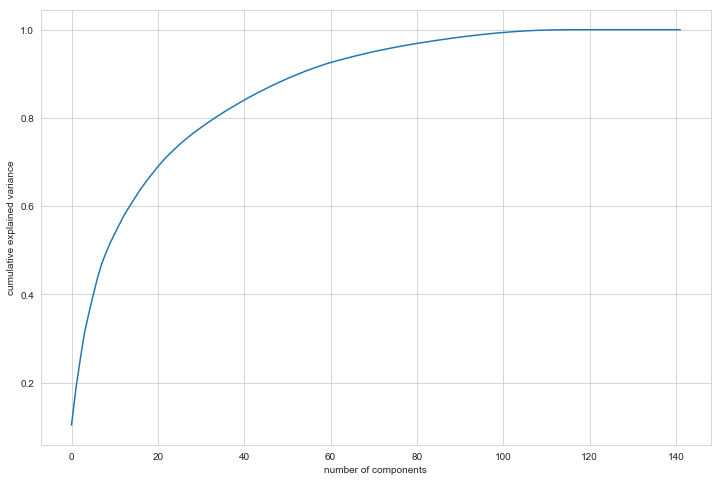

In [105]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [106]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.39, 18.5 , 25.14, 31.26, 35.65, 39.73, 43.66, 46.96, 49.49,
       51.74, 53.77, 55.73, 57.63, 59.26, 60.83, 62.35, 63.86, 65.22,
       66.51, 67.75, 68.96, 70.09, 71.17, 72.12, 73.06, 73.99, 74.82,
       75.62, 76.4 , 77.13, 77.83, 78.52, 79.21, 79.88, 80.51, 81.13,
       81.75, 82.34, 82.92, 83.49, 84.04, 84.59, 85.12, 85.63, 86.13,
       86.62, 87.11, 87.58, 88.03, 88.47, 88.9 , 89.32, 89.73, 90.13,
       90.52, 90.89, 91.25, 91.6 , 91.93, 92.26, 92.55, 92.83, 93.1 ,
       93.36, 93.61, 93.86, 94.1 , 94.34, 94.57, 94.8 , 95.02, 95.23,
       95.43, 95.63, 95.83, 96.02, 96.2 , 96.38, 96.55, 96.72, 96.88,
       97.04, 97.19, 97.34, 97.49, 97.64, 97.78, 97.92, 98.06, 98.19,
       98.31, 98.43, 98.55, 98.67, 98.78, 98.89, 98.99, 99.09, 99.19,
       99.28, 99.36, 99.44, 99.52, 99.59, 99.66, 99.72, 99.77, 99.81,
       99.85, 99.88, 99.9 , 99.92, 99.94, 99.95, 99.96, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

## Apply logistic regression with 48 columns (90% explained variance)

In [107]:
pca48 = PCA(n_components=48)

In [108]:
df_train_pca48 = pca48.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca48.transform(X_test)
print(df_test_pca48.shape)

(37596, 48)
(8552, 48)


In [109]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca48, y_tr)

# Predicted probabilities
y_pred48 = logsk1.predict(df_test_pca48)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)

In [110]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred48))

[[6637 1473]
 [  77  365]]


In [111]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred48))

LogisticRegression accuracy with PCA:  0.818755846585594


# <font color='green'>SUMMARY PART 3: PCA with Logistic Regression</font>

OBSERVATIONS
1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. SMOTE is applied to balance data
3. 81% accuracy with default PCA
4. 90% variance can be explained with 48 columns and maintain 81% accuracy
5. Key features are arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

NEXT STEPS:
1. Run other models with LASSO and RFE

# <font color='orange'>PART 3: LASSO & DECISSION TREE</font>

In [112]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.options.display.float_format = '{:.2f}'.format

In [113]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.00,0.00,0.00,1,3.00,6.00,5.00
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.00,354.00,207.00,0,5.00,0.00,1.00
2,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0.00
3,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.00,712.00,540.00,0,12.00,24.00,7.00
4,7000149764,977.02,2362.83,409.23,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.00,20424.00,455.00,0,0.00,1.00,5.00


In [114]:
print('Dataframe Shape: ', master_df.shape)
print("Dataframe Info: \n"); master_df.info()

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


In [115]:
# Drop MemberID/Phone-number
telecom = master_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [116]:
#list(master_df)
master_df.shape

(28504, 144)

### Data Standardization/Normalization

In [117]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [118]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [119]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


### Balance data set by oversampling

In [120]:
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [121]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 142)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


### Feature reduction using LASSO

In [122]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37666, 45)
[  0   1   3  10  13  14  20  23  29  34  38  39  40  47  49  52  53  58
  65  78  79  80  83  91  92  98 101 102 104 107 108 109 110 111 113 116
 118 120 121 128 132 135 139 140 141]


In [123]:
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'night8_0.0', 'fb7_0.0', 'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [124]:
X_train = X_lasso
y_train = y_tr

In [125]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37666 observations and 45 features
Unique target labels: [0 1]


### Decision Tree with default hyperparameter

In [126]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [127]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8075
           1       0.23      0.74      0.35       477

   micro avg       0.85      0.85      0.85      8552
   macro avg       0.61      0.80      0.63      8552
weighted avg       0.94      0.85      0.88      8552



In [128]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6917 1158]
 [ 125  352]]
0.849976613657624


### Hyperparameter Tuning

NOTE: 
1. Hyperparameter Tunning is commented as it takes heavy computing power and time. It can be run by uncommenting it.
2. Getting 84% accuracy that looks to be pretty good.

### Tuning max_depth

In [129]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [130]:
# scores of GridSearch CV
scores = tree.cv_results_

pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.21,0.01,0.00,0.00,1,{'max_depth': 1},0.77,0.80,0.81,0.80,...,0.80,0.01,39,0.81,0.80,0.80,0.80,0.80,0.80,0.00
1,0.28,0.02,0.00,0.00,2,{'max_depth': 2},0.78,0.80,0.81,0.81,...,0.80,0.01,38,0.82,0.80,0.80,0.81,0.80,0.81,0.01
2,0.47,0.05,0.00,0.00,3,{'max_depth': 3},0.83,0.86,0.86,0.86,...,0.86,0.01,37,0.86,0.86,0.86,0.86,0.86,0.86,0.00
3,0.47,0.02,0.00,0.00,4,{'max_depth': 4},0.86,0.88,0.88,0.88,...,0.88,0.01,36,0.89,0.88,0.88,0.88,0.88,0.88,0.01
4,0.60,0.04,0.00,0.00,5,{'max_depth': 5},0.86,0.89,0.89,0.88,...,0.88,0.01,35,0.89,0.89,0.88,0.89,0.88,0.89,0.00


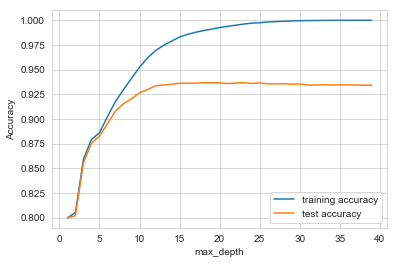

In [131]:
# # plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_max_depth"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

conclusion for max depth:
You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 12, after which the test score is constant. Note that the scores are average accuracies across the 5-folds.

we can consider max_depth=12

### Tuning min_samples_leaf

In [132]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [133]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.55,0.07,0.00,0.00,5,{'min_samples_leaf': 5},0.89,0.94,0.94,0.94,...,0.93,0.02,1,0.98,0.97,0.97,0.97,0.97,0.97,0.00
1,1.29,0.10,0.00,0.00,25,{'min_samples_leaf': 25},0.88,0.92,0.93,0.93,...,0.92,0.02,2,0.95,0.93,0.93,0.94,0.94,0.94,0.00
2,1.22,0.08,0.00,0.00,45,{'min_samples_leaf': 45},0.87,0.91,0.92,0.92,...,0.91,0.02,3,0.93,0.92,0.92,0.92,0.92,0.93,0.00
3,1.24,0.09,0.00,0.00,65,{'min_samples_leaf': 65},0.87,0.91,0.92,0.92,...,0.91,0.02,4,0.93,0.92,0.92,0.92,0.91,0.92,0.01
4,1.18,0.10,0.00,0.00,85,{'min_samples_leaf': 85},0.87,0.91,0.92,0.91,...,0.91,0.02,5,0.92,0.91,0.91,0.91,0.91,0.91,0.00


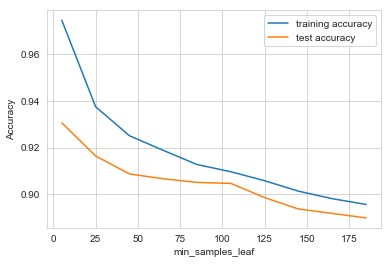

In [134]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

conclusion for min_samples_leaf:
At low values of min_samples_leaf seems overfitted. At values 125,the model becomes more stable and the training and test accuracy start to converge.
min_samples_leaf=125

### Tuning min_samples_split

In [135]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
# # scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.72,0.19,0.00,0.00,5,{'min_samples_split': 5},0.89,0.94,0.95,0.94,...,0.94,0.02,1,1.00,1.00,1.00,1.00,0.99,1.00,0.00
1,1.54,0.08,0.00,0.00,25,{'min_samples_split': 25},0.88,0.93,0.94,0.93,...,0.93,0.02,2,0.98,0.97,0.97,0.97,0.97,0.97,0.00
2,1.52,0.08,0.00,0.00,45,{'min_samples_split': 45},0.88,0.93,0.94,0.93,...,0.92,0.02,3,0.97,0.96,0.96,0.96,0.96,0.96,0.00
3,1.55,0.11,0.00,0.00,65,{'min_samples_split': 65},0.88,0.93,0.94,0.93,...,0.92,0.02,4,0.96,0.95,0.95,0.95,0.95,0.95,0.01
4,1.56,0.13,0.00,0.00,85,{'min_samples_split': 85},0.87,0.93,0.93,0.92,...,0.92,0.02,5,0.95,0.94,0.95,0.94,0.95,0.95,0.00


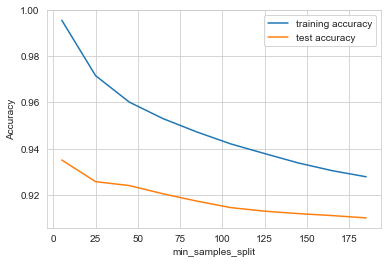

In [137]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

as min_samples_split increase, the tree overfits lesser since the model is less complex

In [138]:
# # Create the parameter grid 
param_grid = {
     'max_depth': range(5, 15, 5),
     'min_samples_leaf': range(50, 150, 50),
     'min_samples_split': range(50, 150, 50),
     'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                           cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [139]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.90,0.12,0.00,0.00,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.86,...,0.88,0.01,9,0.89,0.88,0.88,0.88,0.88,0.88,0.00
1,0.82,0.04,0.00,0.00,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.86,...,0.88,0.01,9,0.89,0.88,0.88,0.88,0.88,0.88,0.00
2,0.84,0.07,0.00,0.00,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.85,...,0.88,0.01,15,0.88,0.88,0.88,0.88,0.88,0.88,0.00
3,0.83,0.07,0.00,0.00,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.85,...,0.88,0.01,15,0.88,0.88,0.88,0.88,0.88,0.88,0.00
4,1.36,0.12,0.00,0.00,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.88,...,0.91,0.02,1,0.93,0.92,0.92,0.92,0.92,0.93,0.00
5,1.33,0.14,0.00,0.00,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.88,...,0.91,0.02,2,0.93,0.92,0.92,0.92,0.92,0.93,0.00
6,1.27,0.10,0.00,0.00,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.87,...,0.90,0.02,7,0.92,0.91,0.91,0.91,0.91,0.91,0.00
7,1.18,0.05,0.00,0.00,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.87,...,0.90,0.02,7,0.92,0.91,0.91,0.91,0.91,0.91,0.00
8,0.55,0.01,0.00,0.00,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.86,...,0.88,0.01,11,0.89,0.88,0.88,0.89,0.88,0.89,0.00
9,0.58,0.04,0.00,0.00,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.86,...,0.88,0.01,11,0.89,0.88,0.88,0.89,0.88,0.89,0.00


In [140]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9111400201773483
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [141]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100,
                                   max_depth=10, 
                                   min_samples_leaf=50,
                                   min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [142]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8900841908325537

# <font color='green'>SUMMARY PART 3: LASSO & DECISSION TREE</font>
OBSERVATIONS
1. 45 features identified by LASSO for model buiding.
2. Getting around 89% accuracy 
3. Confusion matix shows lot of false positives still exist.

NEXT STEPS:
1. Try Random Forrest.

In [143]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.00,0.00,0.00,1,3.00,6.00,5.00
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.00,354.00,207.00,0,5.00,0.00,1.00
2,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0.00
3,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.00,712.00,540.00,0,12.00,24.00,7.00
4,7000149764,977.02,2362.83,409.23,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.00,20424.00,455.00,0,0.00,1.00,5.00


In [144]:
print('Dataframe Shape: ', master_df.shape)
print("Dataframe Info: \n"); master_df.info()

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


In [145]:
# Drop MemberID/Phone-number
telecom = master_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [146]:
X.shape

(28504, 142)

### Data Standardization/Normalization

In [147]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [148]:
#Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [149]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


### Balance data set by oversampling

In [150]:
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [151]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 142)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


### Feature reduction using LASSO

In [152]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37666, 44)
[  0   1   3  10  13  14  20  23  29  34  39  40  47  49  52  53  58  65
  78  79  80  83  91  92 101 102 104 107 108 109 110 111 113 116 118 120
 121 125 128 132 135 139 140 141]


In [153]:
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'night6_1.0', 'night8_0.0', 'fb7_0.0', 'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [154]:
X_train = X_lasso
y_train = y_tr

In [155]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37666 observations and 44 features
Unique target labels: [0 1]


### Random Forest with default hyperparameter

In [156]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [157]:
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]

predictions = rfc.predict(X_test)

In [159]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.48      0.48      0.48       477

   micro avg       0.94      0.94      0.94      8552
   macro avg       0.72      0.73      0.73      8552
weighted avg       0.94      0.94      0.94      8552



In [160]:
# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

[[7824  251]
 [ 246  231]]


In [161]:
print(accuracy_score(y_test, predictions))

0.9418849391955099


### Hyperparameter Tuning

NOTE: Hyperparameter Tunning is commented as it takes heavy computing power and time.

### Tuning max_depth

In [162]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [163]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.32,0.04,0.01,0.00,2,{'max_depth': 2},0.80,0.82,0.86,0.79,...,0.82,0.03,4,0.82,0.82,0.85,0.79,0.84,0.83,0.02
1,0.71,0.06,0.01,0.00,7,{'max_depth': 7},0.89,0.91,0.92,0.92,...,0.91,0.01,3,0.92,0.92,0.91,0.92,0.92,0.92,0.00
2,1.00,0.05,0.02,0.00,12,{'max_depth': 12},0.93,0.95,0.96,0.96,...,0.95,0.01,2,0.98,0.97,0.97,0.98,0.97,0.97,0.00
3,1.19,0.08,0.02,0.00,17,{'max_depth': 17},0.93,0.96,0.97,0.96,...,0.96,0.01,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


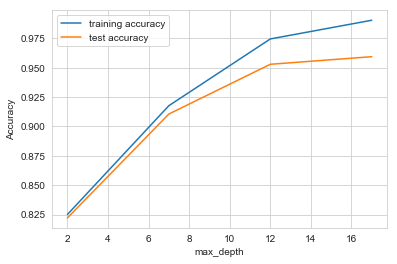

In [164]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_max_depth"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [165]:
 # GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [166]:
# # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.46,0.24,0.08,0.01,100,{'n_estimators': 100},0.85,0.88,0.88,0.88,...,0.88,0.01,2,0.88,0.88,0.87,0.88,0.88,0.88,0.00
1,21.52,0.26,0.41,0.05,500,{'n_estimators': 500},0.85,0.88,0.88,0.88,...,0.87,0.01,4,0.88,0.88,0.87,0.87,0.88,0.88,0.00
2,38.72,0.32,0.74,0.05,900,{'n_estimators': 900},0.86,0.88,0.89,0.88,...,0.87,0.01,3,0.88,0.88,0.87,0.87,0.88,0.88,0.00
3,56.15,0.16,0.94,0.02,1300,{'n_estimators': 1300},0.86,0.88,0.89,0.88,...,0.88,0.01,1,0.88,0.88,0.87,0.88,0.88,0.88,0.00


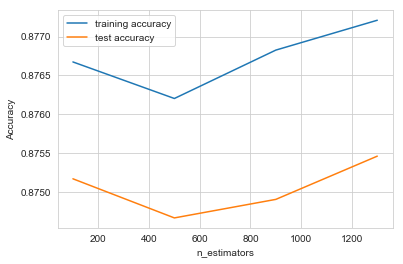

In [167]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_n_estimators"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [168]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4,8,14,20,24,28,32,36,40,44]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                     scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [169]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.34,0.02,0.01,0.00,4,{'max_features': 4},0.85,0.86,0.86,0.86,...,0.86,0.01,10,0.87,0.86,0.85,0.85,0.85,0.86,0.01
1,0.57,0.04,0.01,0.00,8,{'max_features': 8},0.85,0.87,0.88,0.88,...,0.87,0.01,8,0.88,0.88,0.87,0.87,0.87,0.87,0.00
2,0.89,0.05,0.01,0.00,14,{'max_features': 14},0.86,0.87,0.88,0.87,...,0.87,0.01,7,0.88,0.88,0.87,0.87,0.87,0.87,0.01
3,1.22,0.06,0.01,0.00,20,{'max_features': 20},0.86,0.89,0.89,0.89,...,0.88,0.01,3,0.89,0.89,0.88,0.89,0.88,0.89,0.00
4,1.48,0.07,0.01,0.00,24,{'max_features': 24},0.87,0.89,0.90,0.88,...,0.88,0.01,1,0.89,0.89,0.89,0.88,0.88,0.89,0.00


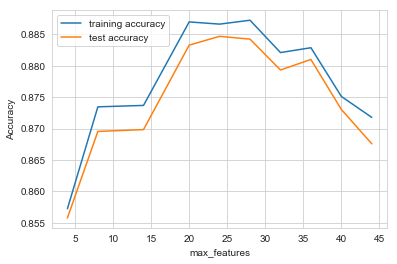

In [170]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_max_features"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [171]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [172]:
# # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.82,0.04,0.01,0.00,100,{'min_samples_leaf': 100},0.89,0.91,0.92,0.91,...,0.91,0.01,1,0.92,0.91,0.91,0.91,0.91,0.91,0.00
1,0.72,0.05,0.01,0.00,150,{'min_samples_leaf': 150},0.88,0.90,0.91,0.90,...,0.90,0.01,2,0.91,0.90,0.90,0.90,0.91,0.90,0.00
2,0.69,0.04,0.01,0.00,200,{'min_samples_leaf': 200},0.87,0.90,0.91,0.90,...,0.90,0.01,3,0.90,0.90,0.89,0.90,0.90,0.90,0.00
3,0.64,0.03,0.01,0.00,250,{'min_samples_leaf': 250},0.87,0.89,0.90,0.90,...,0.89,0.01,4,0.89,0.89,0.89,0.90,0.89,0.89,0.00
4,0.62,0.02,0.01,0.00,300,{'min_samples_leaf': 300},0.86,0.88,0.90,0.89,...,0.88,0.01,5,0.89,0.88,0.89,0.89,0.89,0.89,0.00


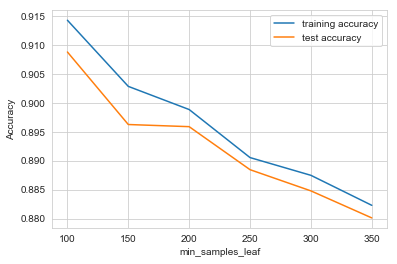

In [173]:
# # plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [174]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [175]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.11,0.09,0.02,0.00,200,{'min_samples_split': 200},0.90,0.93,0.94,0.93,...,0.93,0.01,1,0.94,0.94,0.93,0.93,0.93,0.93,0.00
1,1.06,0.03,0.02,0.00,250,{'min_samples_split': 250},0.90,0.92,0.93,0.93,...,0.92,0.01,2,0.94,0.93,0.93,0.93,0.93,0.93,0.00
2,1.01,0.05,0.01,0.00,300,{'min_samples_split': 300},0.89,0.92,0.93,0.92,...,0.92,0.01,3,0.93,0.92,0.92,0.92,0.92,0.92,0.00
3,0.99,0.04,0.01,0.00,350,{'min_samples_split': 350},0.89,0.92,0.92,0.92,...,0.92,0.01,4,0.93,0.92,0.92,0.92,0.92,0.92,0.00
4,1.04,0.06,0.01,0.00,400,{'min_samples_split': 400},0.88,0.91,0.92,0.92,...,0.91,0.01,5,0.92,0.92,0.92,0.92,0.91,0.92,0.00


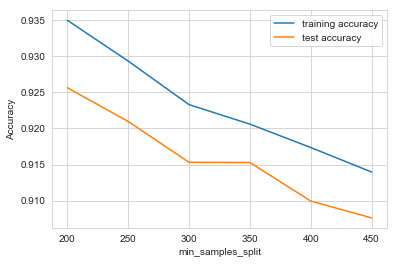

In [176]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [177]:
# Create the parameter grid based on the results of random search 
param_grid = {
     'max_depth': [4,8,10],
     'min_samples_leaf': range(100, 400, 200),
     'min_samples_split': range(200, 500, 200),
     'n_estimators': [100,200, 300], 
     'max_features': [5,10,20,30,40,44]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# # Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 35.2min


In [ ]:
 # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# # model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                              max_depth=10,
                              min_samples_leaf=100, 
                              min_samples_split=200,
                              max_features=10,
                              n_estimators=100)

In [ ]:
# # fit
rfc.fit(X_train,y_train)

In [ ]:
# # predict
predictions = rfc.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

### <font color='green'>SUMMARY PART 3: LASSO & RANDOM FOREST</font>
OBSERVATIONS
1. Getting 94.0% accuracy 
2. Confusion matix clearly improved a lot, false positives still exist but reduced.
3. Features  identified :
'arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'night8_0.0', 'fb7_0.0', 'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8'
